# 1. Business Understanding

# 2. Data Mining

In [325]:
sns.choose_colorbrewer_palette("qualitative")

interactive(children=(Dropdown(description='name', options=('Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Paste…

[(0.8941176470588235, 0.10196078431372557, 0.10980392156862737),
 (0.21568627450980393, 0.4941176470588236, 0.7215686274509804),
 (0.3019607843137256, 0.6862745098039216, 0.29019607843137263),
 (0.5960784313725492, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (0.9999999999999998, 1.0, 0.19999999999999996),
 (0.6509803921568629, 0.33725490196078434, 0.1568627450980391),
 (0.9686274509803922, 0.5058823529411766, 0.7490196078431374),
 (0.6, 0.6, 0.6)]

In [326]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style = "white", palette = sns.color_palette("Set1"))

df = pd.read_csv("King_County_House_prices_dataset.csv")


In [327]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# 3. Data Cleaning

In [328]:
df.isnull().sum().sort_values(ascending=False)

yr_renovated     3842
waterfront       2376
view               63
sqft_lot15          0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
condition           0
sqft_living15       0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
lat                 0
long                0
id                  0
dtype: int64

What to predict: 
* price

What to ignore:
* id, date,

What to maybe ignore:
* lat,long, zip code
* view(has been viewed?)
* year renovated (many missing)

In [357]:
df_clean = df.drop(["id","date","lat","long","zipcode","view", "yr_renovated", "waterfront"], axis = 1)


In [358]:
df_clean.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0.0,1955,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400.0,1951,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0.0,1933,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910.0,1965,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0.0,1987,1800,7503


In [359]:
df_clean.isnull().sum().sort_values(ascending=False)

sqft_basement    454
sqft_lot15         0
sqft_living15      0
yr_built           0
sqft_above         0
grade              0
condition          0
floors             0
sqft_lot           0
sqft_living        0
bathrooms          0
bedrooms           0
price              0
dtype: int64

data categorical:
grade,condition,floors,watefront

sqft_basement (has to be repaired)

In [360]:
df_clean['sqft_basement'] = pd.to_numeric(df_clean['sqft_basement'],errors='coerce')
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21143 non-null float64
yr_built         21597 non-null int64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(4), int64(9)
memory usage: 2.1 MB


In [363]:

df_clean=df_clean.dropna()
df_clean.shape

(21143, 13)

In [364]:
y = df_clean.price
X_train, X_test, y_train, y_test = train_test_split(df_clean, y, test_size=0.2)

# 4. Data Exploration

(0, 13)

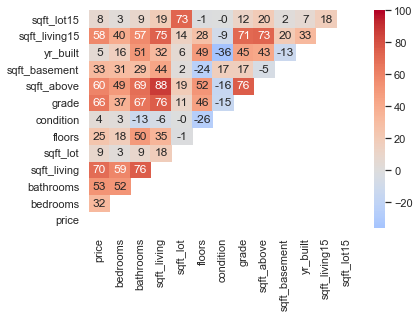

In [366]:
mask = np.triu(X_train.corr())
ax = sns.heatmap(round(X_train.corr()*100)
                 ,annot=True
                 ,mask=mask
                 ,cmap='coolwarm'
                 ,center=0)
ax.set_ylim((0,13))
ax.set_xlim((0,13))

correlated with price:
* sqft above
* sqft living 15
* sqft living
* bathrooms
* bedrooms

autocorrelated:
* sqft_lot 15 with sqft_lot
* sqft_living with sqft_above and sqft_living and sqft_living 15

=> sqft_living, bathrooms, maybe bedrooms

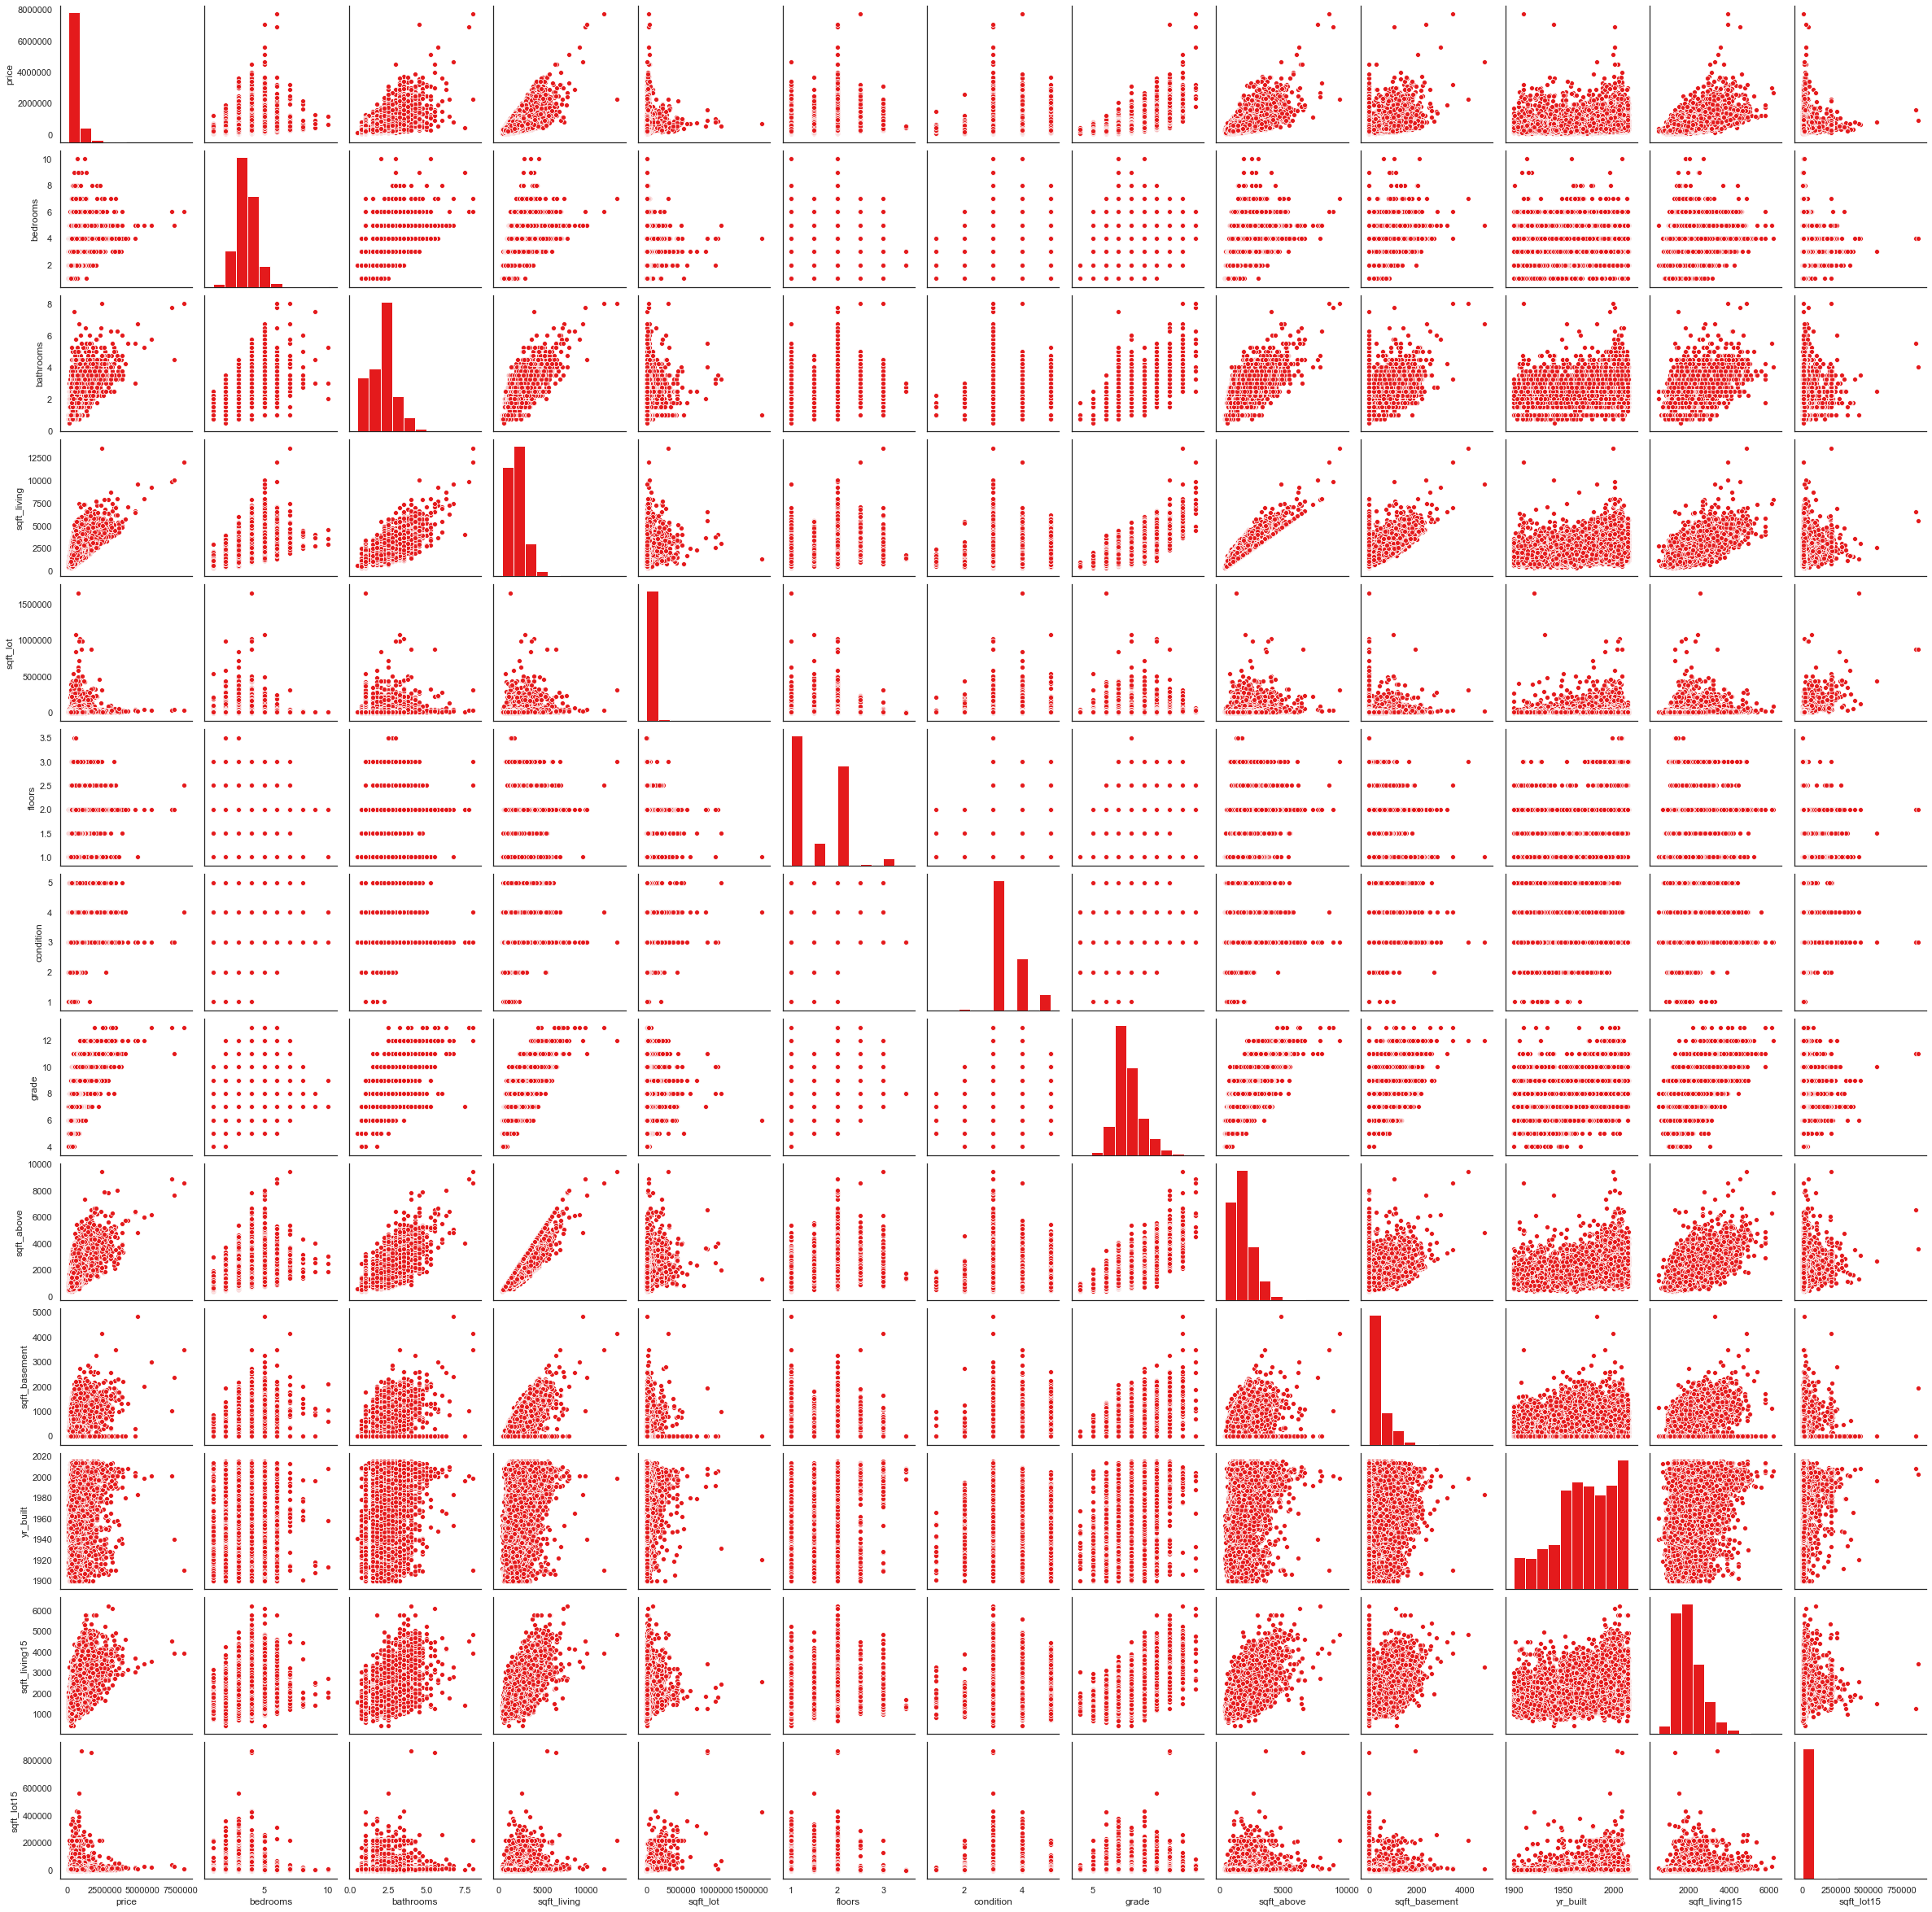

In [367]:
sns.pairplot(X_train);

Interesting features:
* bathrooms
* sqft_living
* sqft_above

Maybe:
* sqft living 15

# 5. Feature Engineering

# 6. Predictive Modeling

## 6.1. "Top Down" Methode

In [387]:
formula = "price ~ "
cols = list(X_train.columns)
cols.pop(cols.index("price"))
for i in cols:
    formula += i + " " + "+" + " "


smf.ols(formula=formula.strip(" + "), data=X_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     2483.
Date:                Tue, 03 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:57:46   Log-Likelihood:            -2.3261e+05
No. Observations:               16914   AIC:                         4.652e+05
Df Residuals:                   16902   BIC:                         4.653e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.092e+06   1.55e+05     45.855      0.000    6.79e+06    7.39e+06
bedrooms      -5.383e+04   2506.497    -21.476      0.000   -5.87e+04   -4.89e+04
bathrooms      5.709e+04   4134.331     13.808      0.000     4.9e+04    6.52e+04
sqft_living     121.9260      2.898     42.078      0.000     116.246     127.606
sqft_lot         -0.0342      0.063     -0.544      0.587      -0.157       0.089
floors         3.062e+04   4496.025      6.811      0.000    2.18e+04    3.94e+04
condition      1.973e+04   2917.653      6.761      0.000     1.4e+04    2.54e+04
grade          1.233e+05   2689.532     45.838      0.000    1.18e+05    1.29e+05
sqft_above       46.6021      2.789     16.709      0.000      41.135      52.069
sqft_basement    75.3239      3.242     23.234      0.000      68.969      81.678
yr_built      -4043.8442     79.364    -50.953      0.000   -4199.406   -3888.282
sqft_living15    35.3849      4.221      8.383      0.000      27.112      43.658
sqft_lot15       -0.4765      0.096     -4.942      0.000      -0.665      -0.288
==============================================================================
Omnibus:                    13969.489   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1128231.228
Skew:                           3.470   Prob(JB):                         0.00
Kurtosis:                      42.405   Cond. No.                     9.92e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.33e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [392]:
formula = "price ~ "
#cols = list(df_wo_cat.columns)
cols.pop(cols.index("sqft_lot"))
#cols.pop(cols.index("sqft_above"))
#cols.pop(cols.index("bedrooms"))
for i in cols:
    formula += i + " " + "+" + " "

# remove sqft_lot from formula, p >= 0.05
# remove sqft_above because of collinearity
# remove bedrooms cause coefficient < 0

smf.ols(formula=formula.strip(" + "), data=X_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     2731.
Date:                Tue, 03 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:58:24   Log-Likelihood:            -2.3261e+05
No. Observations:               16914   AIC:                         4.652e+05
Df Residuals:                   16903   BIC:                         4.653e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.091e+06   1.55e+05     45.852      0.000    6.79e+06    7.39e+06
bedrooms      -5.379e+04   2505.445    -21.469      0.000   -5.87e+04   -4.89e+04
bathrooms      5.707e+04   4134.171     13.806      0.000     4.9e+04    6.52e+04
sqft_living     121.8371      2.893     42.115      0.000     116.167     127.508
floors         3.071e+04   4492.932      6.835      0.000    2.19e+04    3.95e+04
condition      1.973e+04   2917.567      6.764      0.000     1.4e+04    2.55e+04
grade          1.233e+05   2689.471     45.840      0.000    1.18e+05    1.29e+05
sqft_above       46.4931      2.782     16.713      0.000      41.040      51.946
sqft_basement    75.3439      3.242     23.243      0.000      68.990      81.698
yr_built      -4043.4199     79.359    -50.951      0.000   -4198.971   -3887.869
sqft_living15    35.4978      4.216      8.420      0.000      27.235      43.761
sqft_lot15       -0.5140      0.067     -7.620      0.000      -0.646      -0.382
==============================================================================
Omnibus:                    13973.841   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1129875.360
Skew:                           3.471   Prob(JB):                         0.00
Kurtosis:                      42.434   Cond. No.                     5.85e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.38e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

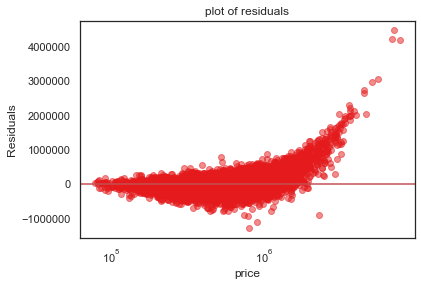

In [393]:
plt.scatter(x=X_train.price, y=smf.ols(formula=formula.strip(" + "), data=X_train).fit().resid, alpha = 0.5)
plt.title("plot of residuals")
plt.axhline(color='r')
plt.ylabel("Residuals")
plt.xlabel("price")
plt.xscale("log");

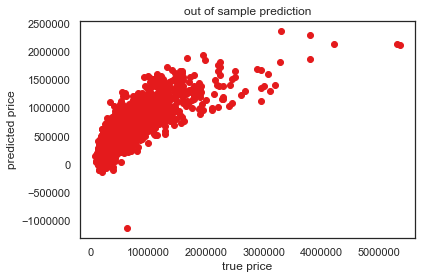

In [394]:

y_pred = smf.ols(formula=formula.strip(" + "), data=X_train).fit().predict(X_test)
plt.scatter(x=y_test, y=y_pred)
plt.ylabel("predicted price")
plt.xlabel("true price")
plt.title("out of sample prediction");

In [395]:
print("Mean Squared Error (less is better):" + str(mean_squared_error(y_test, y_pred)))
print("R2 score (closer to 1 is better):" + str(r2_score(y_test, y_pred)))

Mean Squared Error (less is better):50612554731.918724
R2 score (closer to 1 is better):0.6313963712656488


## 6.2. Ausgewählte Variablen

In [396]:
# Aus correlation matrix und pairplots: bathrooms und sqft_living
smf.ols(formula="price ~ sqft_living + sqft_above + sqft_living15", data=X_train_wo_cat).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     5541.
Date:                Tue, 03 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:58:36   Log-Likelihood:            -2.2482e+05
No. Observations:               16197   AIC:                         4.496e+05
Df Residuals:                   16193   BIC:                         4.497e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.017e+05   6198.814    -16.402      0.000   -1.14e+05   -8.95e+04
sqft_living     269.4958      4.889     55.127      0.000     259.914     279.078
sqft_above      -40.3803      5.215     -7.743      0.000     -50.603     -30.158
sqft_living15    76.9541      4.668     16.487      0.000      67.805      86.103
==============================================================================
Omnibus:                    12068.081   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           627234.615
Skew:                           3.077   Prob(JB):                         0.00
Kurtosis:                      32.859   Cond. No.                     1.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

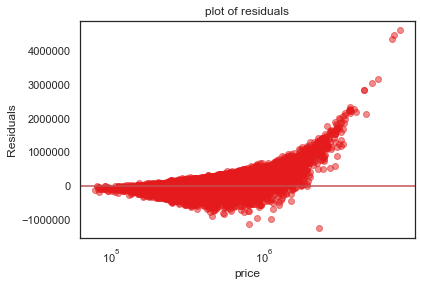

In [397]:
plt.scatter(x=X_train.price, y=smf.ols(formula="price ~ sqft_living + sqft_above + sqft_living15", data=X_train).fit().resid, alpha = 0.5)
plt.title("plot of residuals")
plt.axhline(color='r')
plt.ylabel("Residuals")
plt.xlabel("price")
plt.xscale("log");

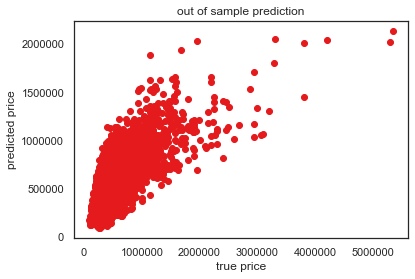

In [398]:
y_pred = smf.ols(formula="price ~ sqft_living + sqft_above + sqft_living15", data=X_train).fit().predict(X_test)

plt.scatter(x=y_test, y=y_pred)
plt.ylabel("predicted price")
plt.xlabel("true price")
plt.title("out of sample prediction");

In [399]:
print("Mean Squared Error (less is better):" + str(mean_squared_error(y_test, y_pred)))
print("R2 score (closer to 1 is better):" + str(r2_score(y_test, y_pred)))

Mean Squared Error (less is better):65915791849.892456
R2 score (closer to 1 is better):0.5199451955060908


# 7. Visualization

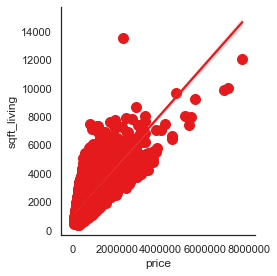

In [345]:
sns.lmplot(x="price", y="sqft_living", data=df_wo_cat, palette="muted", height=4, scatter_kws={"s": 100, "alpha": 1});

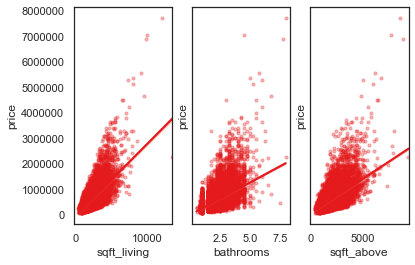

In [346]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, squeeze = True, sharey=True)
sns.regplot(x="sqft_living", y="price", data=df_wo_cat, scatter_kws={"s": 10, "alpha": 0.3}, ax=ax1)
sns.regplot(x="bathrooms", y="price", data=df_wo_cat, scatter_kws={"s": 10, "alpha": 0.3}, ax=ax2)
sns.regplot(x="sqft_above", y="price", data=df_wo_cat, scatter_kws={"s": 10, "alpha": 0.3}, ax=ax3)
#sns.regplot(x="price", y="sqft_above", data=df_wo_cat, scatter_kws={"s": 100, "alpha": 0.3}, ax=ax2)

# A. Summary

# B. Future Work

In [ ]:
# wieviel weichen unsere prognosen prozentual von den jeweiligen tatsächlichen preisen ab?